# Partial Differential Equation

Obtain the approximate solution of the problem defined below using explicit and implicit methods:

$$
\frac{\partial^2u}{\partial x^2} = \frac{\partial u}{\partial t}
$$

For $0 \le x \le 1$, boundary conditions are given as: $u(0,t) = 0 $  and $u(1,t) = 1 $

And at $t=0$, the $u$ values are defined as: $u(x,0) = x^2$,

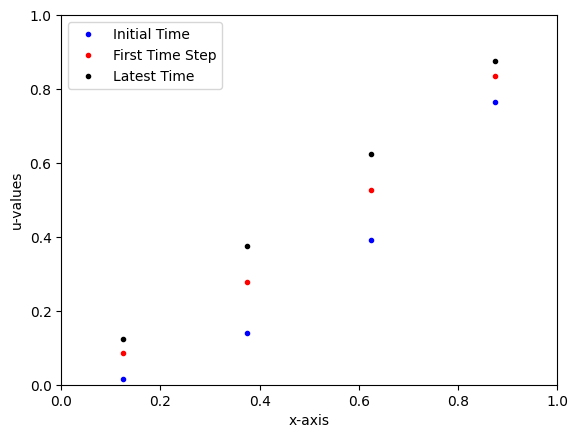

In [13]:
import matplotlib.pyplot as plt

import numpy as np

L = 1
T = 1

Nx = 4
Nt = 100

dx = L/Nx
dt = T/Nt

x = np.arange(dx/2,L,dx)

u = x**2

beta = dt/dx**2

A = np.zeros((Nx,Nx))
b = np.zeros(Nx)

for i in range(Nx):
    
    A[i,i] = 2*beta+1

    if i>0:
        A[i,i-1] = -beta
    else:
        A[i,i] += beta

    if i<Nx-1:
        A[i,i+1] = -beta
    else:
        A[i,i] += beta
        b[i] = 2*beta

U = np.zeros((Nx,Nt+1))

U[:,0] = u.flatten()

for j in range(Nt):
    
    u = np.linalg.solve(A,u+b)
    
    U[:,j+1] = u.flatten()

plt.plot(x,U[:,0],"b.",label="Initial Time")
plt.plot(x,U[:,10],"r.",label="First Time Step")
plt.plot(x,U[:,-1],"k.",label="Latest Time")

plt.xlim((0,1))
plt.ylim((0,1))

plt.xlabel("x-axis")
plt.ylabel("u-values")

plt.legend()
plt.show()